<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [3]:
# Check for GPU
!nvidia-smi

Tue Jan 14 10:42:11 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        Off | 00000000:1A:00.0 Off |                  N/A |
| 30%   40C    P0             106W / 350W |      0MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.3.1+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

1. 自动驾驶汽车

2. 医疗影像

3. 安全，计算机视觉可以用来检测是否有人正在侵入您家。 

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

过拟合的意思是，过于精确地训练数据，而这些模式无法推广到从未见过的数据。

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. 使用正则化技术 - 使用Dropout，随机丢弃不同层中的神经元，以便剩余的神经元希望学习到更强健的权重。

2. 使用不同的模型 - 去掉一些层或者选择一个完全不同的模型。

3. 减少数据中的噪声、清理数据集等等。 

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [5]:
# Done！

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
# 导包
import torchvision
from torchvision import datasets
from torchvision import transforms

In [7]:
# 得到MNIST训练数据集
train_data = datasets.MNIST(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)# 在下载数据集的时候，对它进行转换。

test_data = datasets.MNIST(
    root=".",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [8]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [9]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
# Data is in tuple from (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image : \n {img}")
print(f"Label : \n {label}")

Image : 
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [11]:
# 查看数据形状
print(f"Image shape : {img.shape} -> [C, H, W]")
print(f"Label: {label} -> int")

Image shape : torch.Size([1, 28, 28]) -> [C, H, W]
Label: 5 -> int


In [12]:
# 查看数据集的类别
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


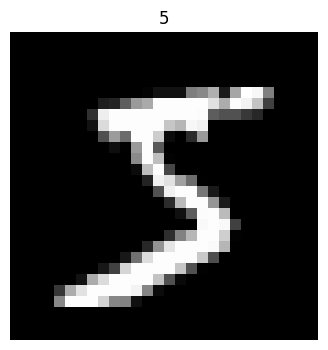

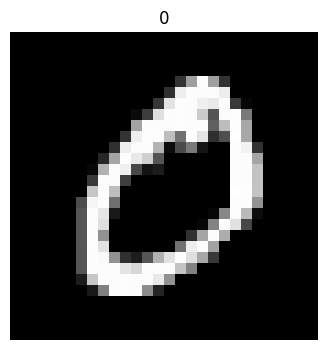

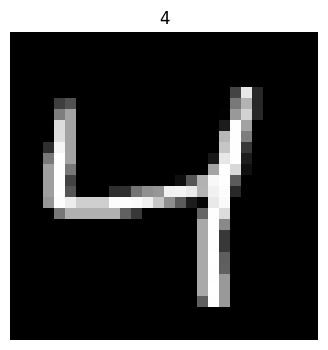

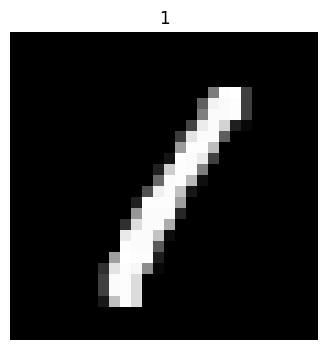

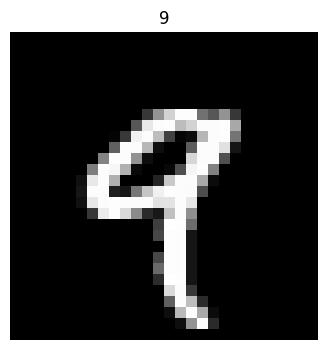

In [13]:
# 导入 matplotlib.pyplot 库，并将其命名为 plt
import matplotlib.pyplot as plt

# 开始一个 for 循环，循环变量 i 从 0 到 4（共循环 5 次）
for i in range(5):
    # 从 train_data 中获取第 i 个样本的图像数据
    img = train_data[i][0]
    # 打印图像数据的形状
    print(img.shape)
    # 去除图像数据中大小为 1 的维度
    img_squeeze = img.squeeze()
    # 打印去除单维后图像数据的形状
    print(img_squeeze.shape)
    # 从 train_data 中获取第 i 个样本的标签数据
    label = train_data[i][1]
    # 创建一个新的图形对象，设置其大小为 4x4 英寸
    plt.figure(figsize=(4,4))
    # 使用 imshow 方法显示图像，cmap='gray' 表示使用灰度颜色映射
    plt.imshow(img_squeeze, cmap='gray')
    # 设置图形的标题为当前图像的标签
    plt.title(label)
    # 隐藏图形的坐标轴
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [14]:
# Create train dataloader
# 导入DataLoader类，用于加载数据
from torch.utils.data import DataLoader

# 创建训练数据加载器对象，指定数据集、批次大小和是否打乱数据顺序
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,  # 每个批次包含32个样本
                              shuffle=True)  # 在每个epoch开始时打乱数据顺序

# 创建测试数据加载器对象，指定数据集、批次大小和是否打乱数据顺序
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,  # 每个批次包含32个样本
                             shuffle=False) # 在每个epoch开始时不打乱数据顺序


In [15]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fdb1b387d40>,
 <torch.utils.data.dataloader.DataLoader at 0x7fdb324e0a10>)

In [18]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [19]:
# 查看长度
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [20]:
from torch import nn
class MNIST_model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [23]:
model = MNIST_model(
    input_shape=1,
    hidden_units=10, 
    output_shape=10
).to(device)

model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [24]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2624, -0.0880,  0.1037],
                        [ 0.2127, -0.2717, -0.1396],
                        [ 0.0622,  0.2296, -0.2763]]],
              
              
                      [[[-0.0476,  0.1092, -0.0630],
                        [ 0.1411, -0.0736, -0.1979],
                        [ 0.1091, -0.2097, -0.1156]]],
              
              
                      [[[ 0.1959, -0.3255, -0.0448],
                        [-0.0577, -0.1377, -0.0623],
                        [-0.0760,  0.1360, -0.1577]]],
              
              
                      [[[-0.1925,  0.1603, -0.2945],
                        [ 0.1367, -0.2639, -0.1740],
                        [-0.1695,  0.1996, -0.2615]]],
              
              
                      [[[ 0.2034, -0.2588, -0.2224],
                        [-0.1952, -0.2956, -0.0789],
                        [-0.3184, -0.3082,  0.3327]]],
              
              
      

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
%%time

from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNIST_model(input_shape=1, 
                        hidden_units=10,
                        output_shape=10).to("cpu")

# 创建损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

# 训练循环
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()

        # Put data on CPU
        X, y = X.to("cpu"), y.to("cpu")

        # Forward pass
        y_pred = model_cpu(X)

        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Step the optimizer
        optimizer.step()

    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)

    ### Testing loop
    test_loss_total = 0

    # Put model in eval mode 
    model_cpu.eval()

    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on CPU
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss
    
        test_loss_total /= len(test_dataloader)
  
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

 20%|██        | 1/5 [00:12<00:49, 12.31s/it]

Epoch: 0 | Loss: 0.264 | Test loss: 0.074


 40%|████      | 2/5 [00:24<00:37, 12.37s/it]

Epoch: 1 | Loss: 0.072 | Test loss: 0.063


 60%|██████    | 3/5 [00:37<00:24, 12.43s/it]

Epoch: 2 | Loss: 0.055 | Test loss: 0.043


 80%|████████  | 4/5 [00:49<00:12, 12.36s/it]

Epoch: 3 | Loss: 0.047 | Test loss: 0.038


100%|██████████| 5/5 [01:01<00:00, 12.33s/it]

Epoch: 4 | Loss: 0.039 | Test loss: 0.042
CPU times: user 10min 15s, sys: 468 ms, total: 10min 15s
Wall time: 1min 1s


在GPU上训练

In [27]:
%%time

from tqdm.auto import tqdm 


# Train on GPU
model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    model_gpu.train()
    for batch, (X, y) in enumerate(train_dataloader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model_gpu(X)

        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Step the optimizer
        optimizer.step()

    # Adjust train loss to number of batches
    train_loss /= len(train_dataloader)

    ### Testing loop
    test_loss_total = 0
    # Put model in eval mode and turn on inference mode
    model_gpu.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)
    
            test_pred = model_gpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss

        # Adjust test loss total for number of batches
        test_loss_total /= len(test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

 20%|██        | 1/5 [00:11<00:47, 11.91s/it]

Epoch: 0 | Loss: 0.311 | Test loss: 0.083


 40%|████      | 2/5 [00:24<00:36, 12.03s/it]

Epoch: 1 | Loss: 0.072 | Test loss: 0.046


 60%|██████    | 3/5 [00:35<00:24, 12.00s/it]

Epoch: 2 | Loss: 0.055 | Test loss: 0.047


 80%|████████  | 4/5 [00:47<00:11, 11.90s/it]

Epoch: 3 | Loss: 0.047 | Test loss: 0.038


100%|██████████| 5/5 [00:59<00:00, 11.91s/it]

Epoch: 4 | Loss: 0.040 | Test loss: 0.037
CPU times: user 59.7 s, sys: 294 ms, total: 60 s
Wall time: 59.6 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

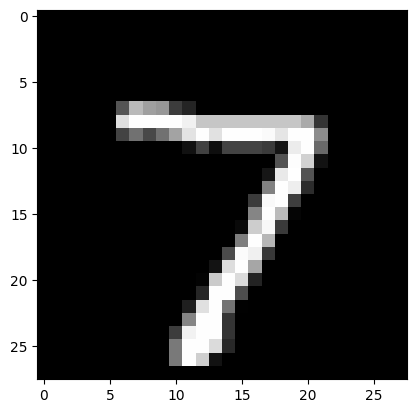

In [28]:
# 对训练的模型做预测
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [30]:
# logits -> Predictions probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

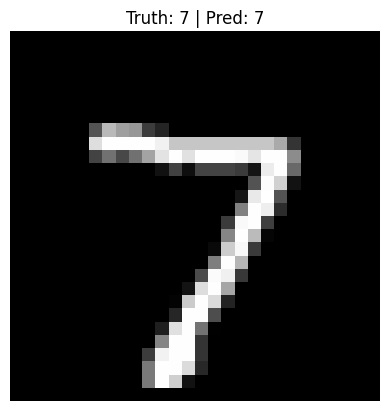

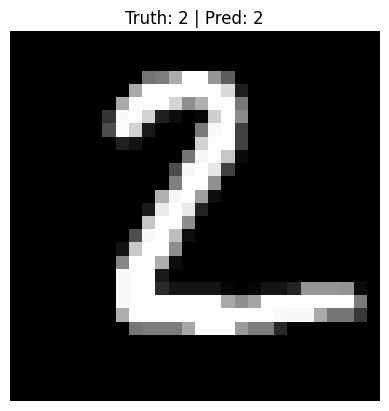

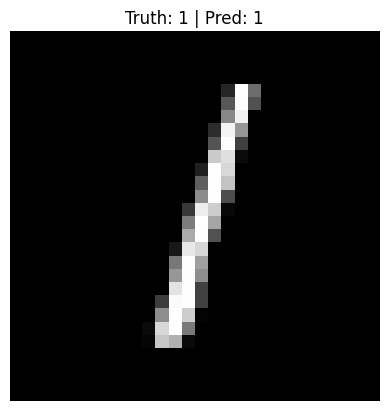

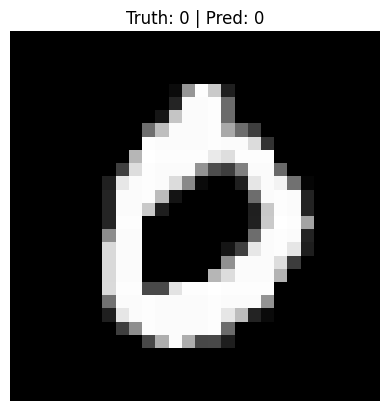

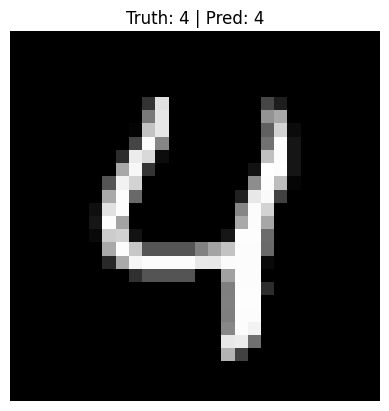

In [31]:
num_to_plot = 5 
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction on image
    model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [32]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

313it [00:00, 452.66it/s]


10000

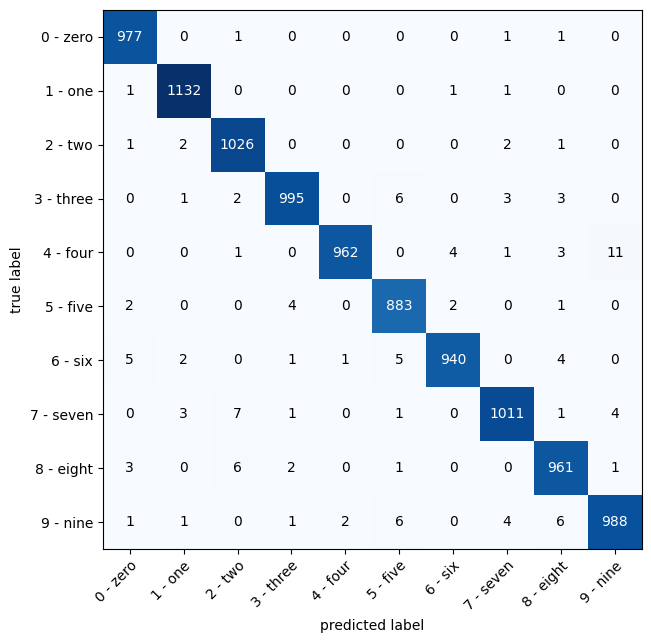

In [33]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [34]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [39]:
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=64, 
                       kernel_size=3, 
                       stride=2, 
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [40]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:03<00:00, 6719718.56it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 95729.26it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1982133.96it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 25890020.37it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [41]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [42]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)
     

(1875, 313)

In [43]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [44]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [45]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task = 'multiclass', num_classes=len(fashion_mnist_class_names)).to(device) 

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0 

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)
  
    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)
    
  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")
     

 20%|██        | 1/5 [00:12<00:51, 12.85s/it]

Epoch: 0 | Train loss: 1.134 | Train acc: 0.58 | Test loss: 195.698 | Test acc: 0.77


 40%|████      | 2/5 [00:25<00:38, 12.89s/it]

Epoch: 1 | Train loss: 0.530 | Train acc: 0.81 | Test loss: 161.804 | Test acc: 0.81


 60%|██████    | 3/5 [00:38<00:25, 12.94s/it]

Epoch: 2 | Train loss: 0.439 | Train acc: 0.84 | Test loss: 147.012 | Test acc: 0.83


 80%|████████  | 4/5 [00:51<00:12, 12.99s/it]

Epoch: 3 | Train loss: 0.399 | Train acc: 0.86 | Test loss: 125.706 | Test acc: 0.86


100%|██████████| 5/5 [01:05<00:00, 13.00s/it]

Epoch: 4 | Train loss: 0.374 | Train acc: 0.86 | Test loss: 126.057 | Test acc: 0.85


In [46]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)    

100%|██████████| 313/313 [00:00<00:00, 446.37it/s]


(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [47]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1473

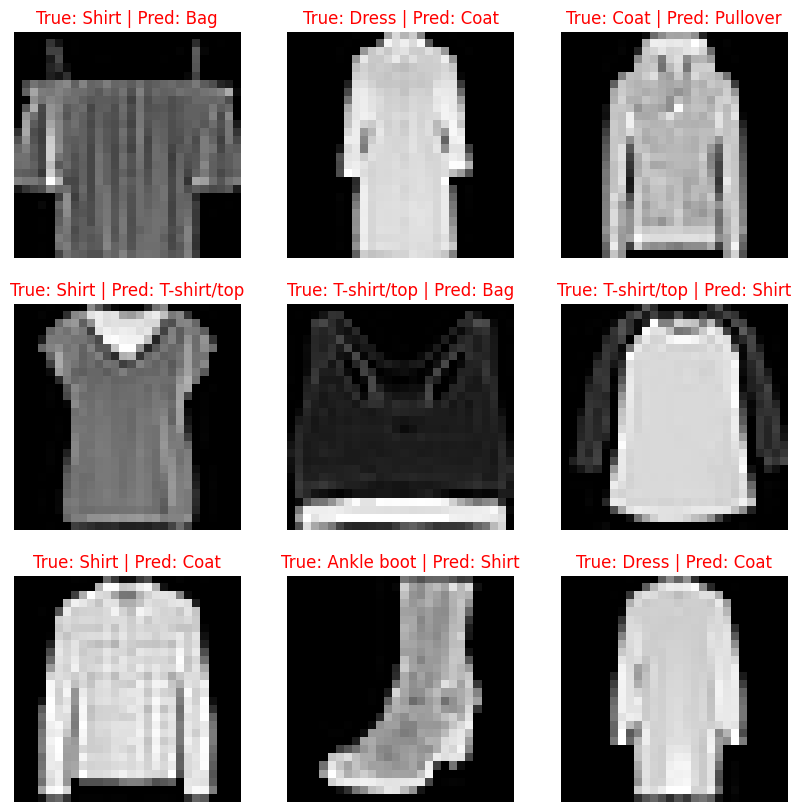

In [48]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);